In [1]:
import  torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [6]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [7]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [8]:
x_train,y_train

(array([[ 3.3  ],
        [ 4.4  ],
        [ 5.5  ],
        [ 6.71 ],
        [ 6.93 ],
        [ 4.168],
        [ 9.779],
        [ 6.182],
        [ 7.59 ],
        [ 2.167],
        [ 7.042],
        [10.791],
        [ 5.313],
        [ 7.997],
        [ 3.1  ]], dtype=float32),
 array([[1.7  ],
        [2.76 ],
        [2.09 ],
        [3.19 ],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53 ],
        [1.221],
        [2.827],
        [3.465],
        [1.65 ],
        [2.904],
        [1.3  ]], dtype=float32))

In [10]:
model = nn.Linear(input_size,output_size)

In [12]:
criterion = nn.MSELoss()
optimiter = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [14]:
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    
    
    optimiter.zero_grad()
    loss.backward()
    optimiter.step()
    
    if (epoch+1) % 5 ==0:
         print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                     num_epochs,
                                                     loss.item()))     

Epoch [5/60], Loss: 25.5173
Epoch [10/60], Loss: 10.4445
Epoch [15/60], Loss: 4.3383
Epoch [20/60], Loss: 1.8645
Epoch [25/60], Loss: 0.8623
Epoch [30/60], Loss: 0.4563
Epoch [35/60], Loss: 0.2918
Epoch [40/60], Loss: 0.2252
Epoch [45/60], Loss: 0.1981
Epoch [50/60], Loss: 0.1872
Epoch [55/60], Loss: 0.1827
Epoch [60/60], Loss: 0.1809


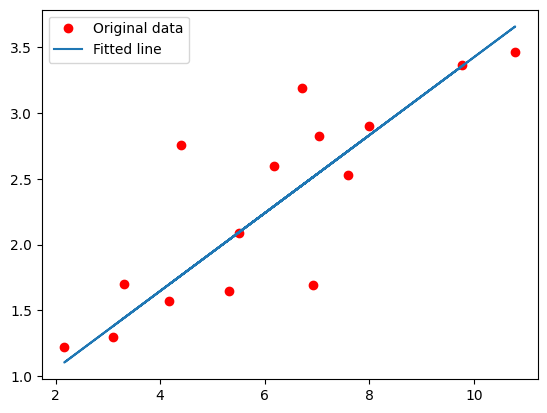

In [15]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [16]:
torch.save(model.state_dict(), 'model.ckpt')